In [1]:
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

import os
import json

In [2]:
DATA_PATH = '../data/RichardKhoury/analytics'
journal_names = os.listdir(DATA_PATH)
journal_names

['latribune',
 'lavoixdelest',
 'ledroit',
 'lenouvelliste',
 'lequotidien',
 'lesoleil']

In [3]:
def load_analytics_json(data=pd.DataFrame(), name='lavoixdelest', lim=50):
    DATA_PATH = f'../data/RichardKhoury/analytics/{name}'
    file_names = os.listdir(DATA_PATH)

    t = tqdm(file_names[:lim], leave=True)
    for file_name in t:
        file_path = f'{DATA_PATH}/{file_name}'
        tmp = pd.read_json(file_path)
        data = data.append(tmp, ignore_index=True)
        t.set_description(f'data shape = {data.shape}')
        t.refresh()

    return data

In [4]:
data = pd.DataFrame()
for journal_name in journal_names:
    data = load_analytics_json(data=data, name=journal_name, lim=7)

data shape = (12918690, 4): 100%|██████████| 7/7 [00:21<00:00,  3.02s/it]


In [5]:
data.describe()

,hash,name,product,createdAt
count,12918690,12918690,12918690,12918690
unique,39493,5,12,12105163
top,23bd9902e6daddfb903151ec265284a6,View,lenouvelliste/mobile,2019-01-05T12:33:28.027Z
freq,549783,5051666,1913698,5


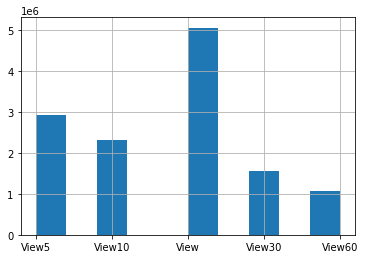

In [6]:
data['name'].hist()

In [7]:
data_score = data[['hash', 'name']]

In [8]:
data_score.head()

,hash,name
0,17a03c299e264e2ab9a354e7126d8aa1,View5
1,17a03c299e264e2ab9a354e7126d8aa1,View10
2,64f2cdbe01bdf227591f95bde8f03280,View
3,a18ab7f1e3ceb4051065263f8a07df8c,View
4,6ca7208c3087d5b97331eda858552de2,View


In [9]:
data_score = data_score.replace(['View', 'View5', 'View10', 'View30', 'View60'], [1, 1, 2, 5, 10])

In [37]:
data_score = data_score.groupby('hash').sum()
data_score = data_score.rename(columns={"name": "score"})
data_score.describe()

,score
count,3.949300e+04
mean,7.889558e+02
std,1.250425e+04
min,1.000000e+00
25%,4.000000e+00
50%,1.900000e+01
75%,3.900000e+01
max,1.897311e+06


In [11]:
data_score.shape

(39493, 1)

In [12]:
data_score['score'].value_counts()

4        8393
19       4811
9        2602
1        1516
2        1515
         ... 
10199       1
30717       1
18461       1
2165        1
2049        1
Name: score, Length: 2001, dtype: int64

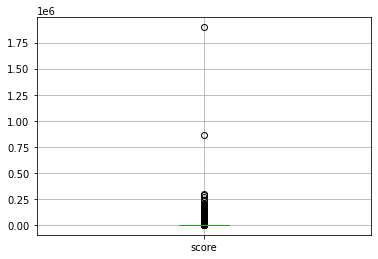

In [13]:
data_score.boxplot()

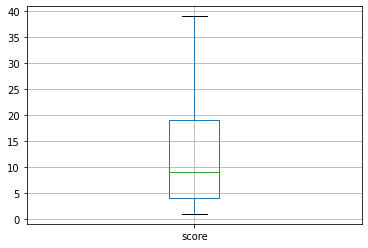

In [41]:
#On gared jusqu'au 3eme quartile
data_score_75 = data_score.loc[data_score['score']<=data_score.describe().iloc[6]['score']]

#C'est mieux !
data_score_75.boxplot()

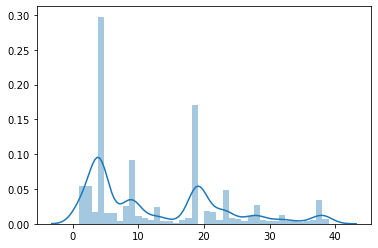

In [29]:
sns.distplot(data_score_75)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E74F568B0>]],
      dtype=object)

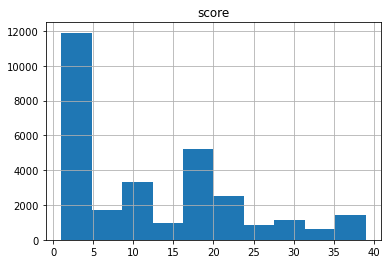

In [30]:
data_score_75.hist()